In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [14]:
df = pd.read_csv('../../datasets/diamond_pricing.csv')
df.head()

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339


In [15]:
x = df[['Paleonium','Pressure']]
y = df['Price']

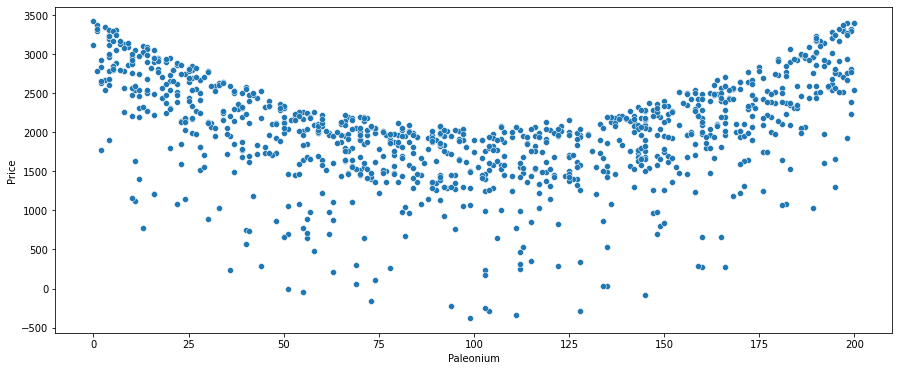

In [16]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Paleonium',y='Price',data=df)
plt.show()

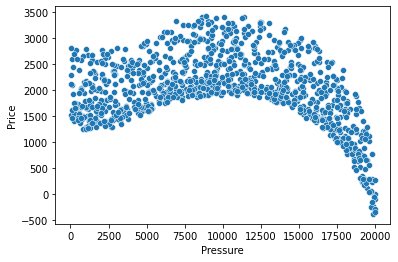

In [17]:
sns.scatterplot(x='Pressure',y='Price',data=df)
plt.show()

In [18]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size=.2,random_state=0)

In [19]:
reg = DecisionTreeRegressor()
reg.fit(trainx,trainy)

DecisionTreeRegressor()

In [20]:
reg.score(testx,testy)* 100

96.08227372794684

In [21]:
ypred = reg.predict(x)


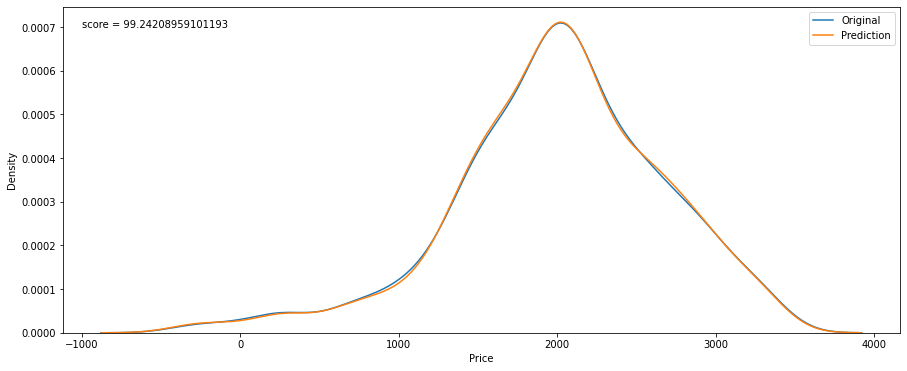

In [22]:
plt.figure(figsize=(15,6))
sns.distplot(y,hist=False,label='Original')
sns.distplot(ypred,hist=False,label='Prediction')
plt.text(-1000,0.0007,f'score = {reg.score(x,y)*100}')
plt.legend()
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
DecisionTreeRegressor?

Init signature:
DecisionTreeRegressor(
    *,
    criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each term

In [32]:
grid_options = {
    'criterion' : ['mse','friedman_mse','mae'],
    'splitter'  : ['best','random'],
    'max_depth' : [5, 10, 25,40]
}

In [33]:
grid = GridSearchCV(reg,grid_options,cv=3)
grid.fit(x,y)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [5, 10, 25, 40],
                         'splitter': ['best', 'random']})

In [34]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_splitter', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [35]:
grid.cv_results_.get('rank_test_score')

array([19, 22,  5, 17,  3, 11,  2, 12, 19, 24,  7, 15,  1, 10,  4, 13, 21,
       23,  9, 16,  6, 14,  8, 18])

In [36]:
grid.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=25)

In [37]:
model_final = DecisionTreeRegressor(criterion='friedman_mse', max_depth=25)
model_final.fit(trainx,trainy)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=25)